# Analaysis of Models

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

RESULTS_DIR = './results/transferlearning/stanford_dog'

## Get Data


In [2]:
def get_results(path, training_metrics_file_name = 'training_metrics.csv', test_metrics_file_name = 'test_metrics.csv'):
    train_df = pd.read_csv(f'{RESULTS_DIR}/{path}/{training_metrics_file_name}')
    test_df = pd.read_csv(f'{RESULTS_DIR}/{path}/{test_metrics_file_name}').T
    test_df.columns = ['accuracy', 'precision', 'recall', 'f1']
    test_df = test_df.reset_index().drop('index', axis = 1)

    return train_df , test_df

vit_base_train_df, vit_base_test_df = get_results('vit-base-patch16-224')
deit_base_train_df, deit_base_test_df = get_results('deit-base-patch16-224')
deit_small_train_df, deit_small_test_df = get_results('deit-small-patch16-224')
deit_tiny_train_df, deit_tiny_test_df = get_results('deit-tiny-patch16-224')
swin_base_train_df, swin_base_test_df = get_results('swin-base-patch4-window7-224')
swin_small_train_df, swin_small_test_df = get_results('swin-small-patch4-window7-224')
swin_tiny_train_df, swin_tiny_test_df = get_results('swin-tiny-patch4-window7-224')

vit_base_test_df['model'] = 'ViT Base'
deit_base_test_df['model'] = 'DeiT Base' 
deit_small_test_df['model'] = 'DeiT Small' 
deit_tiny_test_df['model'] = 'DeiT Tiny' 
swin_base_test_df['model'] = 'Swin Base'
swin_small_test_df['model'] = 'Swin Small'
swin_tiny_test_df['model'] = 'Swin Tiny'


## Plots

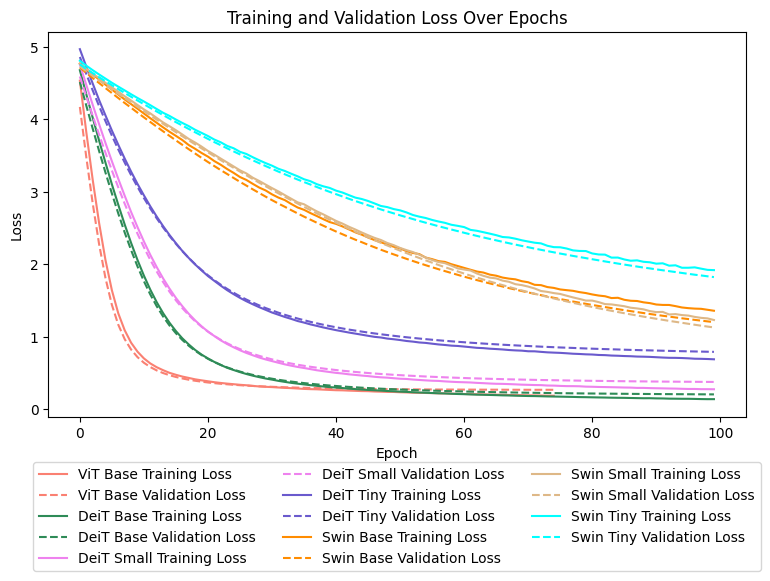

In [4]:
# Plotting
plt.figure(figsize=(9, 5))
plt.plot( vit_base_train_df['Train Loss'], label='ViT Base Training Loss', color = 'salmon')
plt.plot( vit_base_train_df['Validation Loss'], label='ViT Base Validation Loss', linestyle='--', color = 'salmon')

plt.plot( deit_base_train_df['Train Loss'], label='DeiT Base Training Loss',  color = 'seagreen')
plt.plot( deit_base_train_df['Validation Loss'], label='DeiT Base Validation Loss', linestyle='--',  color = 'seagreen')

plt.plot( deit_small_train_df['Train Loss'], label='DeiT Small Training Loss',  color = 'violet')
plt.plot( deit_small_train_df['Validation Loss'], label='DeiT Small Validation Loss', linestyle='--',  color = 'violet')

plt.plot( deit_tiny_train_df['Train Loss'], label='DeiT Tiny Training Loss',  color = 'slateblue')
plt.plot( deit_tiny_train_df['Validation Loss'], label='DeiT Tiny Validation Loss', linestyle='--',  color = 'slateblue')

plt.plot( swin_base_train_df['Train Loss'], label='Swin Base Training Loss',  color = 'darkorange')
plt.plot( swin_base_train_df['Validation Loss'], label='Swin Base Validation Loss', linestyle='--',  color = 'darkorange')

plt.plot( swin_small_train_df['Train Loss'], label='Swin Small Training Loss',  color = 'burlywood')
plt.plot( swin_small_train_df['Validation Loss'], label='Swin Small Validation Loss', linestyle='--',  color = 'burlywood')

plt.plot( swin_tiny_train_df['Train Loss'], label='Swin Tiny Training Loss',  color = 'cyan')
plt.plot( swin_tiny_train_df['Validation Loss'], label='Swin Tiny Validation Loss', linestyle='--',  color = 'cyan')

plt.title('Training and Validation Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')

# Creating a legend
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=3)

plt.show()

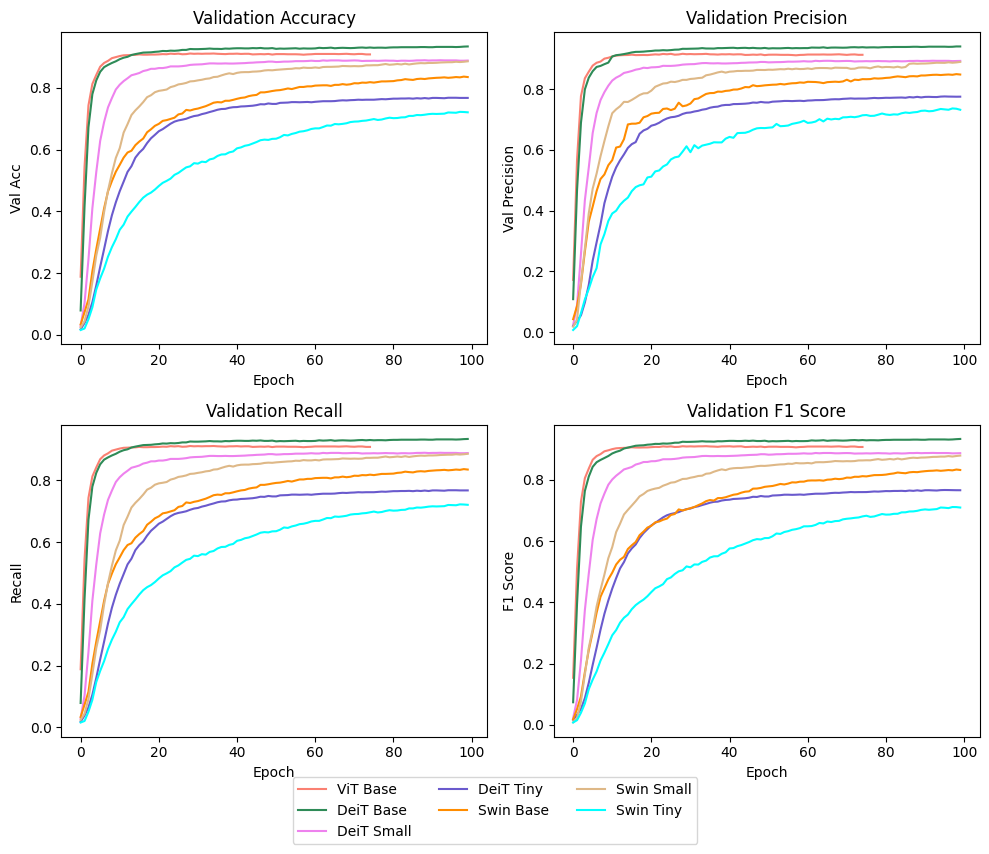

In [5]:
# Creating a 2x2 grid of subplots
fig, axes = plt.subplots(2, 2, figsize=(10, 8))

# Plot 1: Training loss
axes[0, 0].plot( vit_base_train_df['Accuracy'], label='ViT Base', color = 'salmon')
axes[0, 0].plot( deit_base_train_df['Accuracy'], label='DeiT Base',  color = 'seagreen')
axes[0, 0].plot( deit_small_train_df['Accuracy'], label='DeiT Small',  color = 'violet')
axes[0, 0].plot( deit_tiny_train_df['Accuracy'], label='DeiT Tiny',  color = 'slateblue')
axes[0, 0].plot( swin_base_train_df['Accuracy'], label='Swin Base',  color = 'darkorange')
axes[0, 0].plot( swin_small_train_df['Accuracy'], label='Swin Small',  color = 'burlywood')
axes[0, 0].plot( swin_tiny_train_df['Accuracy'], label='Swin Tiny',  color = 'cyan')
axes[0, 0].set_title('Validation Accuracy')
axes[0, 0].set_xlabel('Epoch')
axes[0, 0].set_ylabel('Val Acc')

# Plot 2: Validation loss
axes[0, 1].plot( vit_base_train_df['Precision'], label='ViT Base', color = 'salmon')
axes[0, 1].plot( deit_base_train_df['Precision'], label='DeiT Base',  color = 'seagreen')
axes[0, 1].plot( deit_small_train_df['Precision'], label='DeiT Small',  color = 'violet')
axes[0, 1].plot( deit_tiny_train_df['Precision'], label='DeiT Tiny',  color = 'slateblue')
axes[0, 1].plot( swin_base_train_df['Precision'], label='Swin Base',  color = 'darkorange')
axes[0, 1].plot( swin_small_train_df['Precision'], label='Swin Small',  color = 'burlywood')
axes[0, 1].plot( swin_tiny_train_df['Precision'], label='Swin Tiny',  color = 'cyan')
axes[0, 1].set_title('Validation Precision')
axes[0, 1].set_xlabel('Epoch')
axes[0, 1].set_ylabel('Val Precision')

# Plot 3: Training accuracy
axes[1, 0].plot( vit_base_train_df['Recall'], label='ViT Base', color = 'salmon')
axes[1, 0].plot( deit_base_train_df['Recall'], label='DeiT Base',  color = 'seagreen')
axes[1, 0].plot( deit_small_train_df['Recall'], label='DeiT Small',  color = 'violet')
axes[1, 0].plot( deit_tiny_train_df['Recall'], label='DeiT Tiny',  color = 'slateblue')
axes[1, 0].plot( swin_base_train_df['Recall'], label='Swin Base',  color = 'darkorange')
axes[1, 0].plot( swin_small_train_df['Recall'], label='Swin Small',  color = 'burlywood')
axes[1, 0].plot( swin_tiny_train_df['Recall'], label='Swin Tiny',  color = 'cyan')
axes[1, 0].set_title('Validation Recall')
axes[1, 0].set_xlabel('Epoch')
axes[1, 0].set_ylabel('Recall')

# Plot 4: Validation accuracy
axes[1, 1].plot( vit_base_train_df['F1 Score'], label='ViT Base', color = 'salmon')
axes[1, 1].plot( deit_base_train_df['F1 Score'], label='DeiT Base',  color = 'seagreen')
axes[1, 1].plot( deit_small_train_df['F1 Score'], label='DeiT Small',  color = 'violet')
axes[1, 1].plot( deit_tiny_train_df['F1 Score'], label='DeiT Tiny',  color = 'slateblue')
axes[1, 1].plot( swin_base_train_df['F1 Score'], label='Swin Base',  color = 'darkorange')
axes[1, 1].plot( swin_small_train_df['F1 Score'], label='Swin Small',  color = 'burlywood')
axes[1, 1].plot( swin_tiny_train_df['F1 Score'], label='Swin Tiny',  color = 'cyan')
axes[1, 1].set_title('Validation F1 Score')
axes[1, 1].set_xlabel('Epoch')
axes[1, 1].set_ylabel('F1 Score')

# Collect handles and labels for the combined legend
handles, labels = [], []
for ax in axes.flat:
    for handle, label in zip(*ax.get_legend_handles_labels()):
        if label not in labels:
            handles.append(handle)
            labels.append(label)

# Adjust layout and add the combined legend at the bottom
plt.tight_layout()
fig.legend(handles, labels, loc='lower center', ncol=3, bbox_to_anchor=(0.5, -0.07))

plt.show()


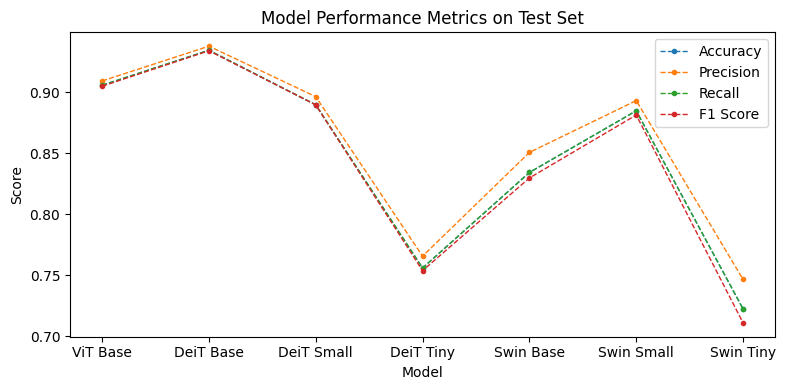

In [7]:
df = pd.concat([vit_base_test_df,deit_base_test_df,deit_small_test_df,deit_tiny_test_df,swin_base_test_df,swin_small_test_df,swin_tiny_test_df])
# Set the 'model' column as the index
df.set_index('model', inplace=True)

# Plotting
plt.figure(figsize=(8, 4))

# Plot accuracy
plt.plot(df.index, df['accuracy'], marker='o', label='Accuracy', linestyle='--', markersize=3, linewidth = 1)

# Plot precision
plt.plot(df.index, df['precision'], marker='o', label='Precision', linestyle='--', markersize=3, linewidth = 1)

# Plot recall
plt.plot(df.index, df['recall'], marker='o', label='Recall', linestyle='--', markersize=3, linewidth = 1)

# Plot f1
plt.plot(df.index, df['f1'], marker='o', label='F1 Score', linestyle='--', markersize=3, linewidth = 1)

plt.title('Model Performance Metrics on Test Set')
plt.xlabel('Model')
plt.ylabel('Score')
plt.legend()
# plt.xticks(rotation=45)  # Rotate model names for better readability
# plt.grid(True)
plt.tight_layout()
plt.show()